In [1]:
# Import our functions
import cgc
# Import numpy and matplotlib for plotting/other utility
import matplotlib.pyplot as plt
import numpy as np
# Make our plots nice and large
plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.size"] = 12

from datetime import datetime

0


/home/jack/workspaces/jupyter-workspace/ParticleProduction/cgc/ArbColors.py:222: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(complex128, 2d, A), array(complex128, 2d, A))
  exponential = expm(-1.j * expArgument)
/home/jack/workspaces/jupyter-workspace/ParticleProduction/cgc/ArbColors.py:222: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(complex128, 2d, C), array(complex128, 2d, A))
  exponential = expm(-1.j * expArgument)
/home/jack/workspaces/jupyter-workspace/ParticleProduction/cgc/ArbColors.py:223: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(complex128, 2d, C), array(complex128, 2d, A))
  wilsonLine[i,j] = np.dot(wilsonLine[i,j], exponential)


1
2
3
4
5
6
7
8
9


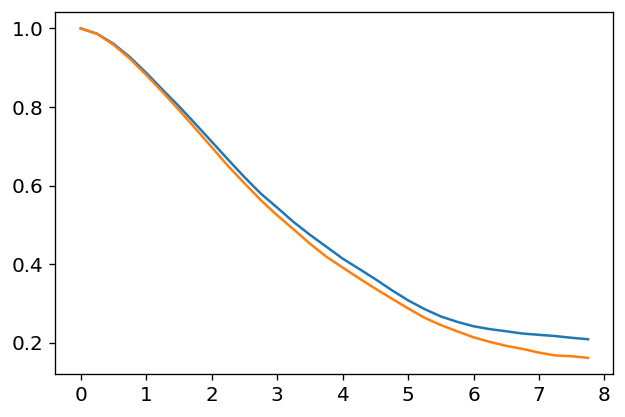

In [3]:
# Constants that define our lattice and color charge distribution
# See documentation for more information
N = 128
L = 32
delta = L/N
mu = 1
radius = 1

C=np.zeros(int(N/4));
for i in range(10):
    nucleus = cgc.Nucleus(3, N, delta,  mu,  M=0.2, Ny=50)
    print (i)
    for d in range(int(N/4)):
        C[d] += np.sum(np.real( [ np.trace(np.dot(nucleus.wilsonLine()[i,0],np.conjugate(np.transpose(nucleus.wilsonLine()[i,d])) )) for i in range (N)]))

cpp=np.loadtxt('c.dat')
plt.plot(delta*np.arange(int(N/4)),(C/N/3/10))
plt.plot(cpp[:,0],cpp[:,1])

In [2]:
# Test how fast it takes to calculate certain things
# Constants that define our lattice and color charge distribution
# See documentation for more information
N = 128
L = 32
delta = L/N
mu = 1
radius = 1

times = np.zeros((3, 10))

for i in range(10):
    nucleus = cgc.Nucleus(3, N, delta, mu, M=0.2, Ny=100)
    
    start = datetime.now()
    nucleus.gaugeField()
    end = datetime.now()
    times[0,i] = (end - start).seconds + (end - start).microseconds/1e6
    
    start = datetime.now()
    nucleus.wilsonLine()
    end = datetime.now()
    times[1,i] = (end - start).seconds + (end - start).microseconds/1e6
    
    start = datetime.now()
    nucleus.adjointWilsonLine()
    end = datetime.now()
    times[2,i] = (end - start).seconds + (end - start).microseconds/1e6
    
print(f'Average gauge field computation time: {np.mean(times[0,:])}')
print(f'Average wilson line computation time: {np.mean(times[1,:])}')
print(f'Average adjoint wilson line computation time: {np.mean(times[2,:])}')

Average gauge field computation time: 1.0354256999999998
Average wilson line computation time: 9.7169921
Average adjoint wilson line computation time: 0.778468


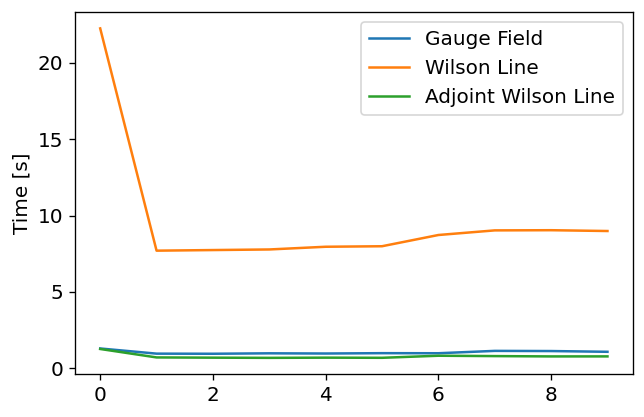

In [3]:
plt.plot(times[0], label='Gauge Field')
plt.plot(times[1], label='Wilson Line')
plt.plot(times[2], label='Adjoint Wilson Line')
plt.ylabel(r'Time [s]')
plt.legend()
plt.savefig('calculation_times.png')
plt.show()